# Response time and equilibrium states of glaciers with different bed types

In [1]:
# The commands below are just importing the necessary modules and functions
# Plot defaults
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams['figure.figsize'] = (9, 6)  # Default plot size
# Scientific packages
import numpy as np
# Constants
from oggm.cfg import SEC_IN_YEAR
# OGGM models
from oggm.core.models.massbalance import ConstantBalanceModel
from oggm.core.models.flowline import FluxBasedModel
from oggm.core.models.flowline import VerticalWallFlowline, TrapezoidalFlowline, ParabolicFlowline
# This is to set a default parameter to a function. Just ignore it for now
from functools import partial
FlowlineModel = partial(FluxBasedModel, inplace=False)

In [2]:
import matplotlib as mpl
# modify plot properties
mpl.rc('lines', linewidth=1.5)

mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=15)

mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

mpl.rc('legend', fontsize=15)
mpl.rc('legend', frameon=True)

In [3]:
import my_colors as mc
vert_fl_col = [mc.vert_fl_1, mc.vert_fl_2, mc.vert_fl_3]
trap_fl_col = [mc.trap_fl_1, mc.trap_fl_2, mc.trap_fl_3]
para_fl_col = [mc.para_fl_1, mc.para_fl_2, mc.para_fl_3]

(-1, 9)

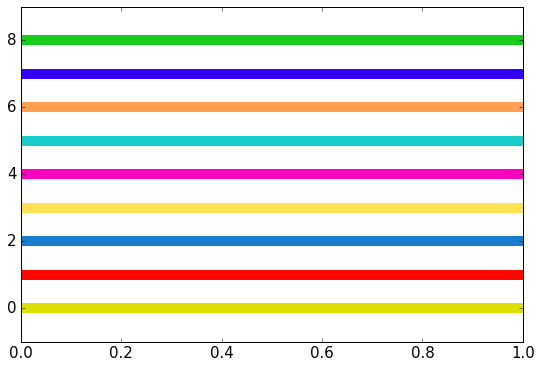

In [4]:
for i in range(0,3):
    color_list = [vert_fl_col[i], trap_fl_col[i], para_fl_col[i]]
    for k in range(0,3):
        plt.axhline(i+k+i*2, lw=10, color=color_list[k])
        
plt.ylim([-1,9])

## Glacier bed

In [4]:
# This is the bed rock
# linearily decreasing from altitude z1 to z2, in nx steps
nx = 400
z1 = 3500
z2 = 0
z_ref = ela = 3000
factor_1 = 1.5
factor_2 = 0.5

bed_h_0 = np.linspace(z1, z2, nx)
bed_h_1 = bed_h_0 * factor_1 + (z_ref*(1-factor_1))
bed_h_2 = bed_h_0 * factor_2 + (z_ref*(1-factor_2))

# Let's set the model grid spacing to 100m (needed later)
map_dx = 1e4/nx

In [5]:
bed_h_col = ['#6C7A89','#ABB7B7', 'k']

end_bed_h = 4000/map_dx

bed_h_list = list()
bed_h_list.append(bed_h_0)
bed_h_list.append(bed_h_1)
bed_h_list.append(bed_h_2)

In [6]:
# calc slope
deg = np.zeros(3)
x = np.linspace(0, (nx-1)*map_dx, nx)
for i,b in enumerate(bed_h_list):
    dy = b[0] - b[-1]
    dx = x[-1] - x[0]
    a = np.arctan(dy/dx)
    deg[i] = np.rad2deg(a)

NameError: name 'mb_model' is not defined

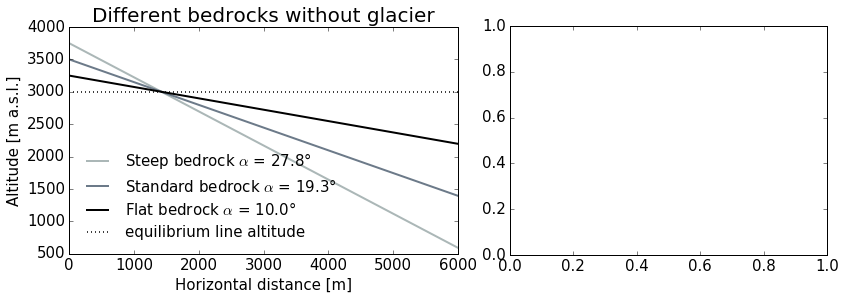

In [7]:
mpl.rc('legend', frameon=False)
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.6, 1])

plt.plot(x, bed_h_list[1], color=bed_h_col[1], label=r'Steep bedrock $\alpha$ = {}°'.format(round(deg[1],1)), lw=2)
plt.plot(x, bed_h_list[0], color=bed_h_col[0], label=r'Standard bedrock $\alpha$ = {}°'.format(round(deg[0],1)), lw=2)
plt.plot(x, bed_h_list[2], color=bed_h_col[2], label=r'Flat bedrock $\alpha$ = {}°'.format(round(deg[2],1)), lw=2)

plt.axhline(z_ref, color='k', label='equilibrium line altitude', linestyle=':')

plt.title('Different bedrocks without glacier');
plt.xlabel('Horizontal distance [m]');
plt.ylabel('Altitude [m a.s.l.]');

plt.legend(loc=3);

plt.gca().set_aspect('equal')
plt.axis([0,6e3,5e2,4e3]);

ax_ = fig.add_axes([0.68, 0.235, 0.49, 0.53]);

ax_.plot(mb_model.get_mb(bed_h_list[1])*SEC_IN_YEAR,
         bed_h_list[1], color=mc.mb_color_1, lw=5);

ax_.axhline(z_ref, color='k', label='equilibrium line altitude', linestyle=':')

#ax_.text(-12, 3500, r'$\frac{\mathrm{d}b}{\mathrm{d}z} = 5\cdot 10^{-3}$ m w.e. a$^{-1}$ m$^{-1}}$', fontsize=20)

ax_.set_xlabel('Mass balance [m w.e. a$^{-1}$]');
ax_.set_ylabel('Altitude [m a.s.l.]', );
ax_.set_title('Mass balance profile');
ax_.set_ylim([500,4000]);

ax_.set_xticks(np.arange(-15, 5.1, 2.5));
ax_.set_xlim([-12.5,3.75]);
ax_.yaxis.tick_right();
ax_.yaxis.set_label_position('right')


ax_.title.set_y(1.01)
ax.title.set_y(1.01)


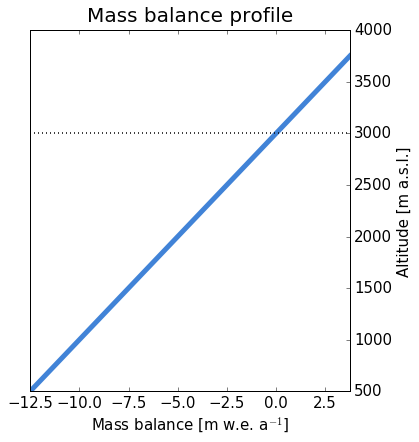

In [129]:
fig = plt.figure()
ax_ = fig.add_axes([0, 0, 0.37, 0.627]);

ax_.plot(mb_model.get_mb(bed_h_list[1])*SEC_IN_YEAR,
         bed_h_list[1], color=mc.mb_color_1, lw=5);

ax_.axhline(z_ref, color='k', label='equilibrium line altitude', linestyle=':')

#ax_.text(-12, 3500, r'$\frac{\mathrm{d}b}{\mathrm{d}z} = 5\cdot 10^{-3}$ m w.e. a$^{-1}$ m$^{-1}}$', fontsize=20)

ax_.set_xlabel('Mass balance [m w.e. a$^{-1}$]');
ax_.set_ylabel('Altitude [m a.s.l.]', );
ax_.set_title('Mass balance profile');
ax_.set_ylim([500,4000]);

ax_.set_xticks(np.arange(-15, 5.1, 2.5));
ax_.set_xlim([-12.5,3.75]);
ax_.yaxis.tick_right();
ax_.yaxis.set_label_position('right')
ax_.title.set_y(1.01)



In [95]:
mb_model.get_mb(2000)*SEC_IN_YEAR

-4.999999999999999

In [75]:
bed_h_list[1][0]

3750.0

## Mass balance

Defining the mass balance model with an equilibrium-line altitude mb_ela im m and an altitude gradient mb_grad in mm m$^{-1}$

In [8]:
mb_ela = 3000
mb_grad = 5
mb_model = ConstantBalanceModel(mb_ela, grad=mb_grad)

0.0
-4.999999999999999


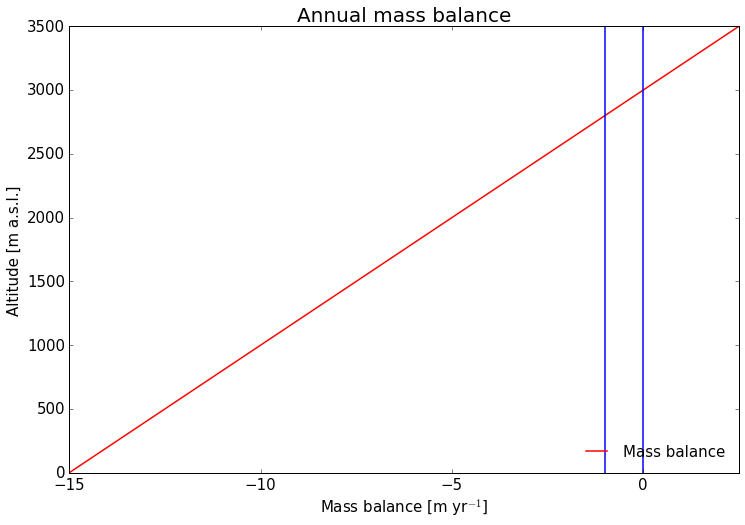

In [169]:
plt.plot(mb_model.get_mb(surface_h)*SEC_IN_YEAR,
         bed_h, color='r', label='Mass balance')
plt.xlabel('Mass balance [m yr$^{-1}$]')
plt.ylabel('Altitude [m a.s.l.]')
plt.title('Annual mass balance')
plt.axis('tight')
plt.legend(loc=4)
plt.axvline(0)
plt.axvline(-1)

print(mb_model.get_mb(3000)*SEC_IN_YEAR)
print(mb_model.get_mb(2000)*SEC_IN_YEAR)

## Flowlines

In [9]:
ind_bed_h = 0
bed_h = bed_h_list[ind_bed_h].copy()
# At the begining, there is no glacier so our glacier surface is at the bed altitude
surface_h = bed_h

Define widths and the three different flowline types as a list.

In [10]:
flowline_name = ['Vertical Wall Flowline', 
                 'Trapezoidal Flowline', 
                 'Parabolic Flowline']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

### Vertical Wall Flowline

In [11]:
# The units of widths is in "grid points"
w = np.zeros(nx) + 230/map_dx
# Define our U-shaped bed 
init_flowline[0] = VerticalWallFlowline(surface_h=surface_h, bed_h=bed_h,
                            widths=w, map_dx=map_dx)

### Trapezoidal Flowline

In [12]:
# The units of widths is in "grid points"
widths = np.zeros(nx) + 200/map_dx
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

# Define our bed
init_flowline[1] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                    widths=widths, map_dx=map_dx,
                                    lambdas=lambdas)

### Parabolic Flowline

In [13]:
# Define the bed shape
bed_shape = np.zeros(nx) + 0.004

# Define our bed
init_flowline[2] = ParabolicFlowline(surface_h=surface_h, bed_h=bed_h,
                                    bed_shape=bed_shape, map_dx=map_dx)

In [14]:
model = FlowlineModel(init_flowline[2], mb_model=mb_model, y0=0)
model.run_until_equilibrium()

## Model run

#### for n years

In [24]:
year = 100
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
years_cont = np.zeros(n_flowline)

widths_cont = list()
sec_cont = list()
index_terminus = np.zeros(n_flowline)

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for '.format(i+1) + flowline_name[i] + '...')
    
    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until(year)
    
    fls = model.fls[-1]
    
    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    years_cont[i] = model.yr
    
    widths_cont.append(fls.widths_m)
    sec_cont.append(fls.section)
    
    bed_h_cont[i] = fls.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = fls.surface_h
    
    index_terminus[i] = np.where(surface_h_cont[i] == bed_h)[0][0] + 1

1: Running model for Vertical Wall Flowline...
    ... and storing output.
2: Running model for Trapezoidal Flowline...
    ... and storing output.
3: Running model for Parabolic Flowline...
    ... and storing output.


#### till equilibrium

In [47]:
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
years_cont = np.zeros(n_flowline)

widths_cont = list()
sec_cont = list()
index_terminus = np.zeros(n_flowline)

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for '.format(i+1) + flowline_name[i] + '...')
    
    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()
    
    fls = model.fls[-1]
    
    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    years_cont[i] = model.yr
    
    widths_cont.append(fls.widths_m)
    sec_cont.append(fls.section)
    
    bed_h_cont[i] = fls.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = fls.surface_h
    
    index_terminus[i] = np.where(surface_h_cont[i] == bed_h)[0][0] + 1

1: Running model for Vertical Wall Flowline...
    ... and storing output.
2: Running model for Trapezoidal Flowline...
    ... and storing output.
3: Running model for Parabolic Flowline...
    ... and storing output.


#### Plot glacier outlines

4850.0


/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:81: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


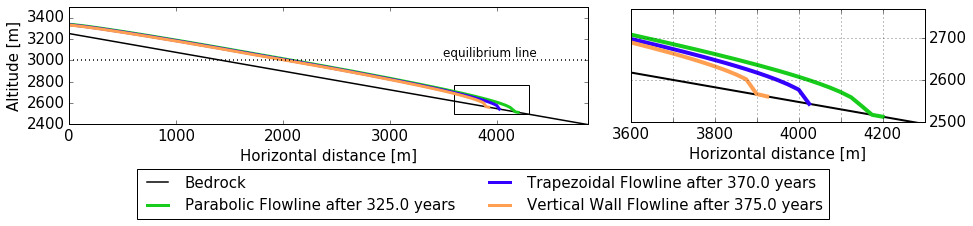

In [48]:
mpl.rc('figure', figsize = (12, 8))

# flat bed

eq = 1

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 2400
y1 = 3500

# limits of zoomed panel
dx_ = 700
x0_ = 3600
x1_ = x0_ + dx_

dy_ = dx_*0.385
y0_ = 2500
y1_ = y0_ + dy_


x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)


fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))

ax1.axhline(ela, color='k', linestyle=':')
x_t = 3500
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
#ax1.set_xticklabels(['','1000','2000','3000','4000','5000',''])

ax1.set_ylim([y0,y1])
#ax1.set_yticks(np.arange(2200, 3401, 400))

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)
lw=4

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=lw)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');

ax2.set_xticks(np.arange(3600, 4301, 100))
ax2.set_xticklabels(['3600', '', '3800', '', '4000', '', '4200'])
ax2.set_yticks(np.arange(2500, 2701, 100))
ax2.yaxis.tick_right()

ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])

ax2.set_aspect('equal', adjustable='box')

ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.35), ncol=2)

3425.0


/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:76: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


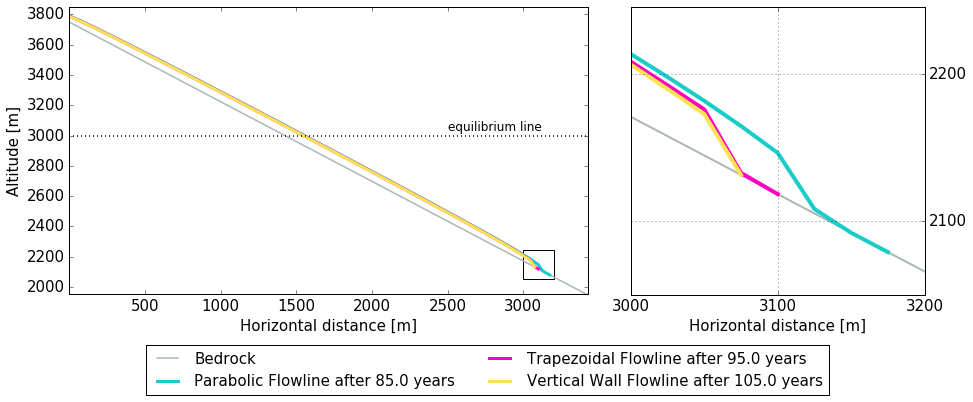

In [41]:
mpl.rc('figure', figsize = (12, 8))
# steep bed
eq = 1

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 1950
y1 = 3850

x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)

# limits of zoomed panel
dx_ = 200
x0_ = 3000
x1_ = x0_ + dx_

dy_ = dx_*0.98
y0_ = 2050
y1_ = y0_ + dy_

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))

ax1.axhline(ela, color='k', linestyle=':')
x_t = 2500
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
ax1.set_xticklabels(['','500','1000','1500','2000','2500','3000'])

ax1.set_yticks(np.arange(2000, 3801, 200))
ax1.set_ylim([y0,y1])

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=4)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');


ax2.set_xticks(np.arange(3000, 3201, 100))
ax2.set_yticks(np.arange(2100, 2201, 100))

ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])
ax2.yaxis.tick_right()


ax2.set_aspect('equal', adjustable='box')

ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.15), ncol=2)

3425.0


NameError: name 'bed_h_cont' is not defined

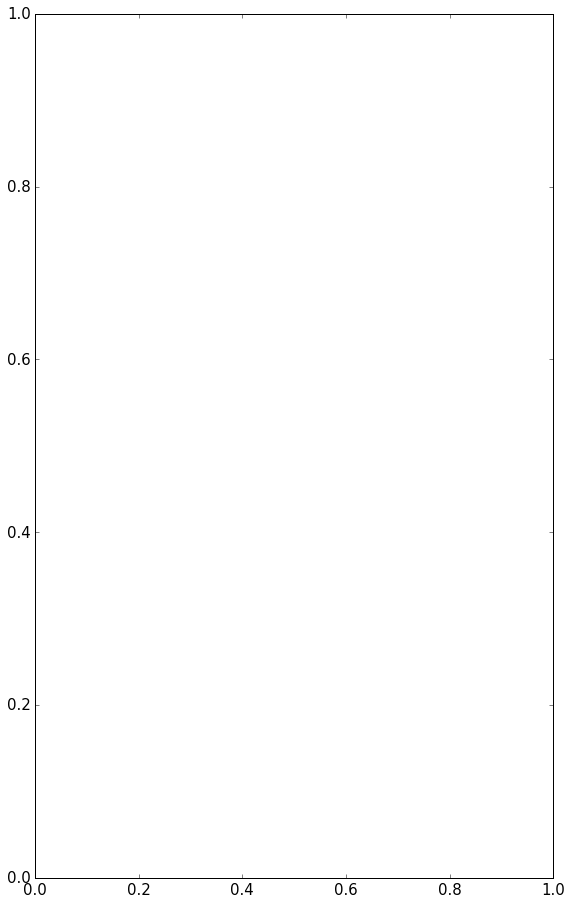

In [30]:
mpl.rc('figure', figsize = (12, 8))
# std glacier
eq = 1

color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

# define limits
# limits of hole plot
y0 = 2300
y1 = 3650

# limits of zoomed panel
dx_ = 300
x0_ = 3100
x1_ = x0_ + dx_

dy_ = dx_*0.8
y0_ = 2300
y1_ = y0_ + dy_

x1 = np.where(bed_h < y0)[0][0]*map_dx
print(x1)

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.6, 1.5])

ax1.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock')

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax1.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=3)
    
ax1.add_patch(patches.Rectangle((x0_, y0_), dx_, dy_, fill=False))
ax1.axhline(ela, color='k', linestyle=':')
x_t = 2700
y_t = ela
ax1.text(x_t, y_t*1.01, 'equilibrium line', fontsize=12)

year = 0
title = 'Glacier profile after {} years'.format(year)
if eq:
    title = 'Glacier profile in equilibrium'
    
#ax1.set_title(title)
ax1.set_xlabel('Horizontal distance [m]');
ax1.set_ylabel('Altitude [m]')

ax1.set_xlim([0,x1])
ax1.set_xticklabels(['','500','1000','1500','2000','2500','3000' ])

ax1.set_ylim([y0,y1])
ax1.set_yticks(np.arange(2400, 3601, 200))

ax1.set_aspect('equal', adjustable='box')

leg_handle, leg_label = ax1.get_legend_handles_labels()

ax2 = fig.add_axes([0.65, 0, 0.34, 1.5])
ax2.grid()

ax2.plot(x, bed_h_cont[0], color=bed_h_col[ind_bed_h], label='Bedrock', lw=2)

for i in range(0, n_flowline)[::-1]:
    ind_term = index_terminus[i]
    
    label='{}'.format(flowline_name[i])
    if eq:
        label='{} after {} years'.format(flowline_name[i], years_cont[i])

    ax2.plot(x[:ind_term], surface_h_cont[i][:ind_term], color=color_list[i],
             label=label, lw=4)
    
#ax2.set_title(title)
ax2.set_xlabel('Horizontal distance [m]');

ax2.set_xticks(np.arange(3100, 3401, 100))
ax2.set_yticks(np.arange(2300, 2501, 100))

y0_ = 2280
y1_ = y0_ + dx_*0.698

ax2.set_xlim([x0_,x1_])
ax2.set_ylim([y0_,y1_])


ax2.yaxis.tick_right()

ax2.set_aspect('equal', adjustable='box')

ax2.legend(leg_handle, leg_label, bbox_to_anchor=(0.7,-0.2), ncol=2)

In [213]:
dx

9975.0

In [42]:
dx*0.6/(y1-y0)

4.615384615384615

In [137]:
model.fls[-1].length_m

3150.0

In [153]:
model.fls[-1].length_m

3375.0

In [ ]:
k = 1
for i in range(0,3)[::-1]:
    ind_term = np.where(surface_h_cont[i] == bed_h)[0][0]
    print(surface_h_cont[i][ind_term-k]-bed_h[ind_term-k])

In [ ]:
np.rad2deg(np.arctan(5.8/17))

In [ ]:
for l in lenght_cont:
    print(l)

In [ ]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    thick.append(thick_)
    thickness[i] = thick_[:72].mean()
    plt.plot(thick_/thick_.max())
    
thickness

In [ ]:
for i, sec_ in enumerate(sec_cont):
    mean = sec_[:72].mean()
    plt.plot(sec_/sec_.max(), label='{}:{} k'.format(flowline_name[i], round(mean/1e3)))
    
plt.legend()

In [ ]:
for i, wi_ in enumerate(widths_cont):
    mean = wi_[:72].mean()
    plt.plot(wi_, label='{}: {}'.format(flowline_name[i], round(mean)))
    
plt.legend()

### Model run till equilibrium

In [134]:
model = FlowlineModel(init_flowline[2], mb_model=mb_model, y0 = 0.)

In [135]:
model.run_until_equilibrium()

3388.7417218543046

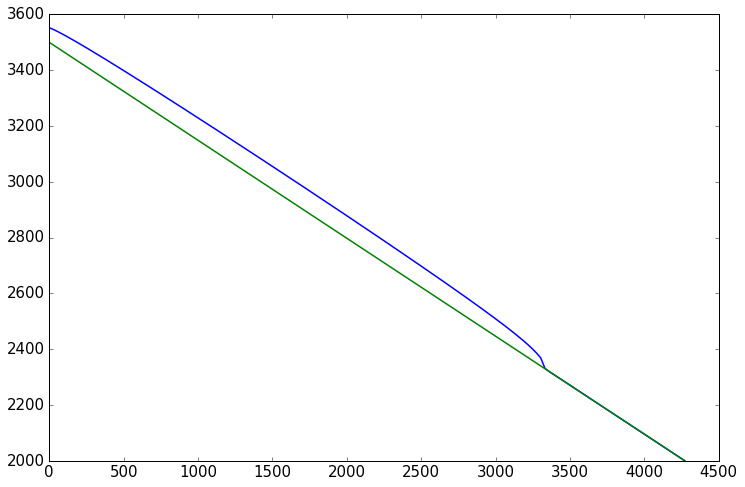

In [138]:
plt.plot(x,model.fls[-1].surface_h)
plt.plot(x,model.fls[-1].bed_h)
model.length_m

### Loop model run

Run the model in a loop to get more information about the evolution of the glacier and to store some intermediate steps from year0 to year1 in year_step steps.

In [90]:
# Define an array for all years of interest
year0 = 0
year1 = 180
year_step = 1
years = np.arange(year0, year1+1, year_step)
n_exp = years.size

In [91]:
# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))
surf_cont_ = np.zeros((n_flowline,n_exp))
width_cont_ = list()
sec_cont_ = list()
thick_cont_ = list()

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    width_cont__ = list()
    sec_cont__ = list()
    thick_cont__ = list()
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        if(np.mod(year_, 50) == 0):
            print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3
        surf_cont_[i][j] = model.area_m2
        width_cont__.append(model.fls[-1].widths_m)
        sec_cont__.append(model.fls[-1].section)
        thick_cont__.append(model.fls[-1].thick)

    
    width_cont_.append(width_cont__)
    sec_cont_.append(sec_cont__)
    thick_cont_.append(thick_cont__)

1: Running model for Vertical Wall Flowline:
    - for 0 years
    - for 50 years
    - for 100 years
    - for 150 years
2: Running model for Trapezoidal Flowline:
    - for 0 years
    - for 50 years
    - for 100 years
    - for 150 years
3: Running model for Parabolic Flowline:
    - for 0 years
    - for 50 years
    - for 100 years
    - for 150 years


### Plot different glacier priorities over the time

In [41]:
import matplotlib as mpl
# modify plot properties
mpl.rc('lines', linewidth=1.5)

mpl.rc('axes', titlesize=20)
mpl.rc('axes', labelsize=20)

mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

mpl.rc('legend', fontsize=20)
mpl.rc('legend', frameon=False)

In [18]:
color_list = [vert_fl_col[ind_bed_h], trap_fl_col[ind_bed_h], para_fl_col[ind_bed_h]]

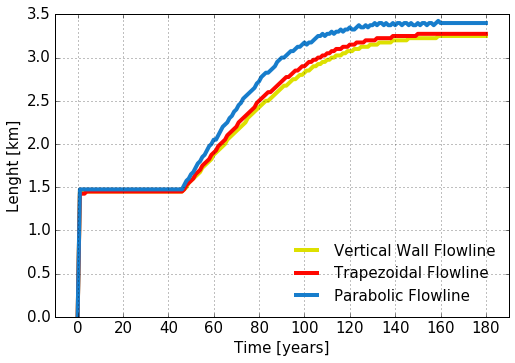

In [151]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.7,0.7])

for i in [0,1,2]:
    len_max = lenght_cont_[i][-1]
    len_max = 1e3
    ax.plot(years, lenght_cont_[i]/len_max, label=flowline_name[i], color=color_list[i], lw=4)

ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))
#ax.set_ylim([0,1.1])
   
ax.set_xlabel('Time [years]')
ax.set_ylabel('Relative lenght')
ax.set_ylabel('Lenght [km]')

ax.grid()

ax.legend(loc=4)

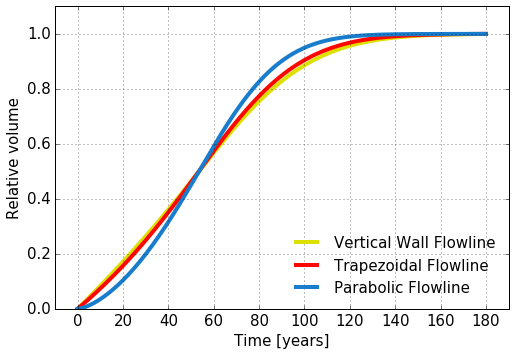

In [152]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.7,0.7])

for i in range(0, n_flowline):
    vol_max = volume_cont_[i][-1]
#    vol_max = 1e9
    ax.plot(years, volume_cont_[i]/vol_max, label=flowline_name[i], color=color_list[i], lw=4)


ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))
ax.set_ylim([0,1.1])

a = ax.get_yaxis()
b = a.get_major_formatter()
b.set_scientific(True)

ax.grid()

ax.set_xlabel('Time [years]')
ax.set_ylabel('Volume [km$^3$]')
ax.set_ylabel('Relative volume')
ax.legend(loc=4)

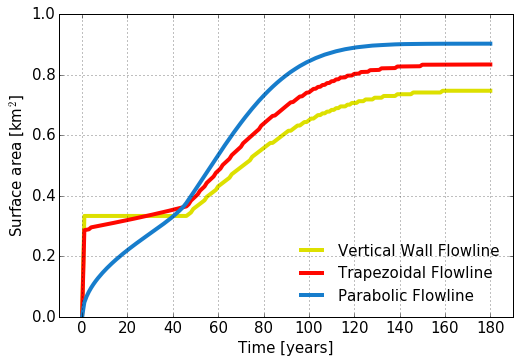

In [145]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.7,0.7])

for i in range(0, n_flowline):
    surf_max = surf_cont_[i][-1]
    surf_max = 1e6
    ax.plot(years, surf_cont_[i]/surf_max, label=flowline_name[i], color=color_list[i], lw=4)


ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))
#ax.set_ylim([0,1.1])

ax.grid()

ax.set_xlabel('Time [years]')
ax.set_ylabel('Relative surface area')
ax.set_ylabel('Surface area [km$^2$]')
ax.legend(loc=4)

In [170]:
glacier_extend = np.zeros((n_flowline, n_years))
for i in range(0,3):
    for y in range(0,n_years):
        glacier_extend[i][y] = np.where(thick_cont_[i][y]==0)[0][0]

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


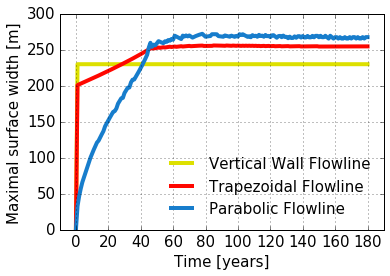

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

n_years = years.size
# create container
max_width = list()
mean_width = list()
for i in range(0,3):
    max_width_ = np.zeros(n_years)
    mean_width_ = np.zeros(n_years)
    for y in range(1,n_years):
        ext = glacier_extend[i][y]
        max_width_[y] = width_cont_[i][y][:ext].max()
        mean_width_[y] = width_cont_[i][y][:ext].mean()
    ax.plot(max_width_, color=color_list[i], label=flowline_name[i], lw=4)
    #ax.plot(mean_width_, color=color_list[i], label=flowline_name[i], lw=4)
    max_width.append(mean_width_)
    mean_width.append(mean_width_)

ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))

ax.grid()

ax.set_xlabel('Time [years]')
ax.set_ylabel('Maximal surface width [m]')
ax.legend(loc=4)

/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/oberrauch/.conda/envs/oggm_env/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


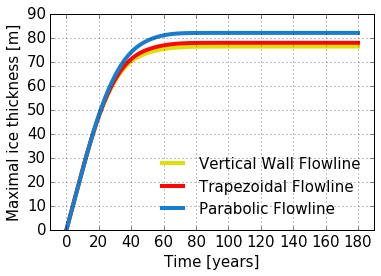

In [181]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])

n_years = years.size
# create container
max_thick = list()
mean_thick = list()


for i in range(0,3):
    max_thick_ = np.zeros(n_years)
    mean_thick_ = np.zeros(n_years)
    for y in range(1,n_years):
        ext = glacier_extend[i][y]
        max_thick_[y] = thick_cont_[i][y][:ext].max()
        mean_thick_[y] = thick_cont_[i][y][:ext].mean()
    ax.plot(max_thick_, color=color_list[i], label=flowline_name[i], lw=4)
#    ax.plot(mean_thick_, color=color_list[i], label=flowline_name[i], lw=4)
    max_thick.append(mean_thick_)
    mean_thick.append(mean_thick_)

ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))

ax.grid()

ax.set_xlabel('Time [years]')
ax.set_ylabel('Maximal ice thickness [m]')
ax.legend(loc=4)

In [49]:
thick_cont_[0][46][:57].mean() 

65.714978454151634

In [47]:
thick_cont_[1][46][:57].mean() 

66.968829197003984

In [48]:
thick_cont_[2][46][:57].mean() 

69.808401007603194

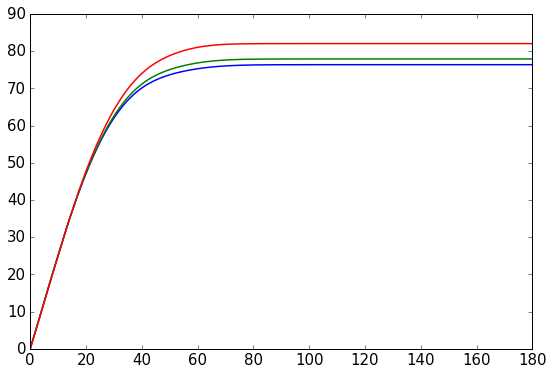

In [131]:
n_years = years.size
# create container
mean_thick = list()
for i in range(0,3):
    mean_thick_ = np.zeros(n_years)
    max = thick_cont_[i][-1].max()
    for y in range(0,n_years):
        mean_thick_[y] = thick_cont_[i][y].max()
    plt.plot(mean_thick_)
    mean_thick.append(mean_thick_)

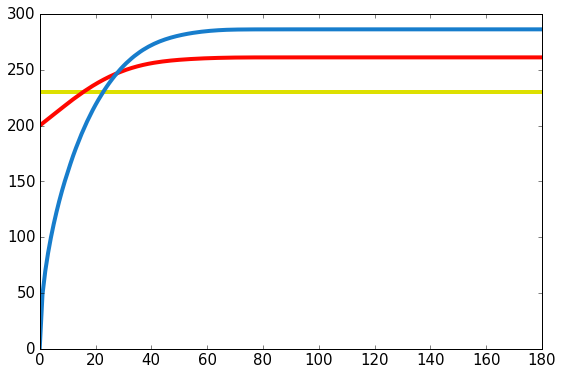

In [136]:
n_years = years.size
# create container
max_width = list()
mean_width = list()
for i in range(0,3):
    max_width_ = np.zeros(n_years)
    mean_width_ = np.zeros(n_years)
    for y in range(0,n_years):
        max_width_[y] = width_cont_[i][y][:57].max()
        mean_width_[y] = width_cont_[i][y][:57].mean()
    plt.plot(max_width_, color=color_list[i], lw=4)
#    plt.plot(mean_width_, color=color_list[i], alpha=0.5, lw=4)
    max_width.append(mean_width_)
    mean_width.append(mean_width_)

In [45]:
width_cont_[1][46][:57].mean() 

252.59719545620433

In [46]:
width_cont_[2][46][:57].mean()

263.59548491723882

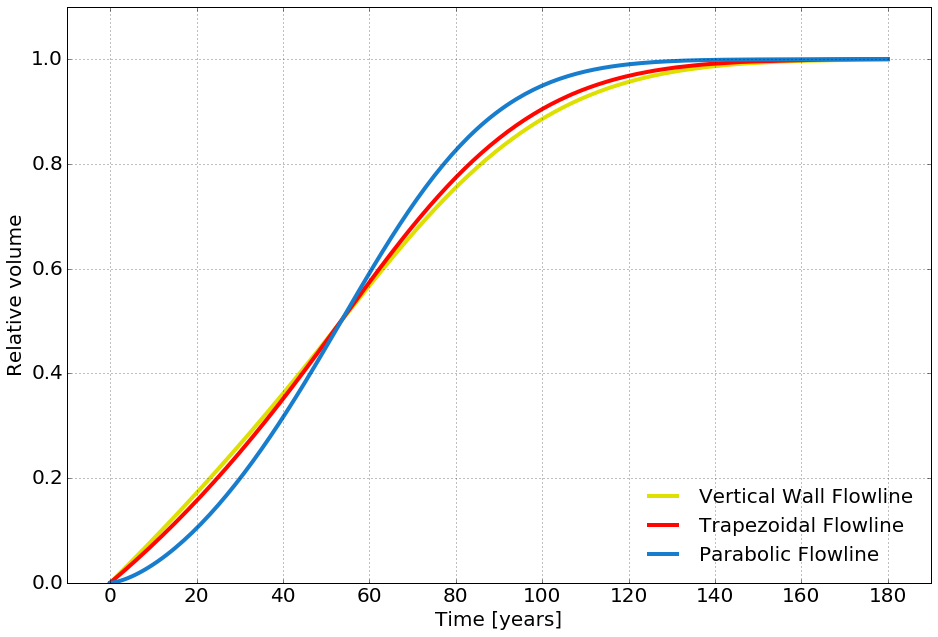

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for i in range(0, n_flowline):
    vol_max = volume_cont_[i][-1]
    ax.plot(years, volume_cont_[i]/vol_max, label=flowline_name[i], color=color_list[i], lw=4)

ax.set_xlim([-10,190])
ax.set_xticks(np.arange(0,181, 20))
ax.set_ylim([0,1.1])

ax.grid()

ax.set_xlabel('Time [years]')
ax.set_ylabel('Relative volume')
ax.legend(loc=4)

In [107]:
cfg.A

2.4e-24

##### Loop model: focus on interesting parts

In [ ]:
# Define an array for all years of interest
year0 = 0
year1 = 100
year_step = 1
years = np.arange(year0, year1+1, year_step)
n_exp = years.size
print(years)

In [ ]:
# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))

print(type(lenght_cont_))

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3

In [ ]:
for i in range(0, n_flowline):
    plt.plot(years, volume_cont_[i], label=flowline_name[i])

plt.title('Glacier volume development over time')
plt.xlabel('Years')
plt.ylabel('Volume [m$^3$]')
plt.legend(loc='best')

## How does width affect length and volume change?!

In [288]:
section = list()
bed_h = surface_h = bed_h_list[0]

#### Trapezoidal bed

In [292]:
flowline_name = ['Width: 100m', 
                 'Width: 200m', 
                 'Width: 300m', 
                 'Width: 400m',
                 'Width: 500m', 
                 'Width: 600m', 
                 'Width: 700m', 
                 'Width: 800m', 
                 'Width: 900m', 
                 'Width: 1000m']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [293]:
map_dx

25.0

In [294]:
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

for i, w in enumerate(np.arange(1, 10+1, 1)):
    widths = np.zeros(nx) + w *(100/map_dx)
    print(widths[0]*map_dx)
    # Define our bed
    init_flowline[i] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=widths, map_dx=map_dx,
                                           lambdas=lambdas)
    
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0., )
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h
    width_cont.append(model.fls[-1].widths_m)
    sec_cont.append(model.fls[-1].section)

100.0
200.0
300.0
400.0
500.0
600.0
700.0
800.0
900.0
1000.0
1: Running model for Width: 100m ...
    ... and storing output.
2: Running model for Width: 200m ...
    ... and storing output.
3: Running model for Width: 300m ...
    ... and storing output.
4: Running model for Width: 400m ...
    ... and storing output.
5: Running model for Width: 500m ...
    ... and storing output.
6: Running model for Width: 600m ...
    ... and storing output.
7: Running model for Width: 700m ...
    ... and storing output.
8: Running model for Width: 800m ...
    ... and storing output.
9: Running model for Width: 900m ...
    ... and storing output.
10: Running model for Width: 1000m ...
    ... and storing output.


In [296]:
for l in lenght_cont:
    print(l)

3300.0
3275.0
3275.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0


In [299]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))

print('thick')
print(mean)
print(med)
print(max_)

thick
[70.0, 70.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0]
[75.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 72.0, 72.0]
[79.0, 78.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0]


In [300]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = width_cont[i]
    
    ind = np.where(width__ == (i+1)*100)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))

print('width')
print(mean)
print(med)
print(max_)

width
[155.0, 255.0, 354.0, 454.0, 554.0, 654.0, 754.0, 854.0, 954.0, 1054.0]
[159.0, 258.0, 357.0, 457.0, 557.0, 657.0, 757.0, 857.0, 957.0, 1057.0]
[162.0, 261.0, 361.0, 461.0, 561.0, 660.0, 760.0, 860.0, 960.0, 1060.0]


In [301]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = sec_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print('section')
print(mean)
print(med)
print(max_)

section
[9041.0, 15877.0, 22615.0, 29625.0, 36453.0, 43300.0, 50131.0, 56962.0, 63791.0, 70619.0]
[9638.0, 16821.0, 24021.0, 31255.0, 38463.0, 45673.0, 52884.0, 60094.0, 67306.0, 74517.0]
[10359.0, 17967.0, 25592.0, 33223.0, 40857.0, 48491.0, 56127.0, 63763.0, 71399.0, 79035.0]


In [267]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n_flowline)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)

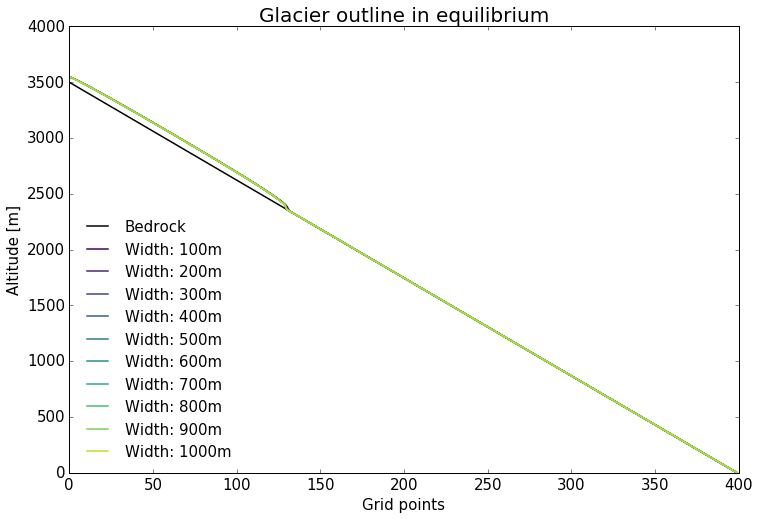

In [268]:
plt.plot(bed_h_cont[0], color='k', label='Bedrock')
for i in range(0, n_flowline):
    col = scalarMap.to_rgba(i)
    plt.plot(surface_h_cont[i], color=col,
             label=flowline_name[i])
    
plt.title('Glacier outline in equilibrium')
plt.xlabel('Grid points')
plt.ylabel('Altitude [m]')
plt.legend(loc=3)

In [269]:
for l in lenght_cont:
    print(l)

3300.0
3275.0
3275.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0


In [270]:
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    thick.append(thick_)
    thickness[i] = np.median(thick_[:ind])

print('median')
print(thickness)

median
[ 74.55052049  73.49801759  73.07798439  72.91681414  72.76776669
  72.66582609  72.59165775  72.53529337  72.49100994  72.45529963]


In [271]:
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    thick.append(thick_)
    thickness[i] = np.max(thick_[:ind])
    
print('max')
print(thickness)

max
[ 79.05168769  77.91497754  77.45506865  77.20643743  77.05073375
  76.94407425  76.86644322  76.80741124  76.76101005  76.72357796]


array([ 70.45122349,  69.65804597,  68.99006295,  69.26600615,
        69.08711539,  68.99231574,  68.90235962,  68.83181389,
        68.77478221,  68.72762729])

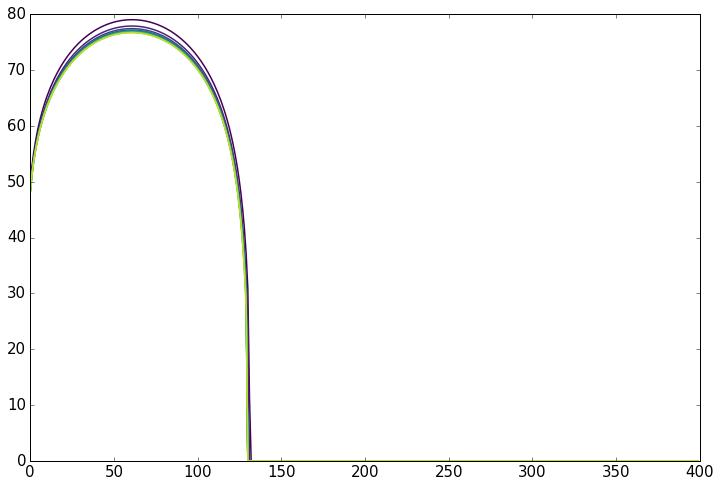

In [273]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

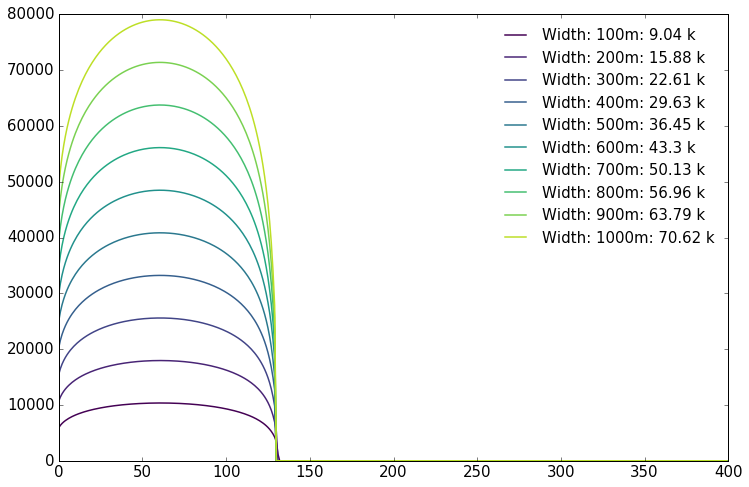

In [280]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{}: {} k'.format(flowline_name[i], round(mean/1e3, 2)), color=col)
    
plt.legend()

### Parabolic bed shape

In [302]:
flowline_name = ['Bedshape: 0.001',
                'Bedshape: 0.0015',
                'Bedshape: 0.002',
                'Bedshape: 0.0025',
                'Bedshape: 0.003',
                'Bedshape: 0.0035',
                'Bedshape: 0.004',]
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [303]:
for r, bs in enumerate(np.linspace(1e-3, 4e-3, 7, endpoint=True)):
    # Define the bed shape
    bed_shape = np.zeros(nx) + bs

    # Define our bed
    init_flowline[r] = ParabolicFlowline(surface_h=surface_h, bed_h=bed_h,
                                        bed_shape=bed_shape, map_dx=map_dx)

# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[-1].surface_h
    width_cont.append(model.fls[-1].widths_m)
    sec_cont.append(model.fls[-1].section)

1: Running model for Bedshape: 0.001 ...
    ... and storing output.
2: Running model for Bedshape: 0.0015 ...
    ... and storing output.
3: Running model for Bedshape: 0.002 ...
    ... and storing output.
4: Running model for Bedshape: 0.0025 ...
    ... and storing output.
5: Running model for Bedshape: 0.003 ...
    ... and storing output.
6: Running model for Bedshape: 0.0035 ...
    ... and storing output.
7: Running model for Bedshape: 0.004 ...
    ... and storing output.


In [304]:
for l in lenght_cont:
    print(l)

3375.0
3400.0
3400.0
3375.0
3375.0
3375.0
3375.0


In [305]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))

print('thickness')
print(mean)
print(med)
print(max_)

thickness
[73.0, 73.0, 73.0, 73.0, 73.0, 73.0, 73.0]
[77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0]
[82.0, 82.0, 82.0, 82.0, 82.0, 82.0, 82.0]


In [306]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = sec_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print('section')
print(mean)
print(med)
print(max_)

section
[26607.0, 21564.0, 18675.0, 16828.0, 15362.0, 14222.0, 13304.0]
[28723.0, 23446.0, 20304.0, 18166.0, 16583.0, 15353.0, 14362.0]
[31333.0, 25583.0, 22156.0, 19817.0, 18090.0, 16748.0, 15667.0]


In [307]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = width_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print('width')
print(mean)
print(med)
print(max_)

width
[538.0, 436.0, 378.0, 340.0, 311.0, 288.0, 269.0]
[556.0, 454.0, 393.0, 352.0, 321.0, 297.0, 278.0]
[573.0, 468.0, 405.0, 362.0, 331.0, 306.0, 286.0]


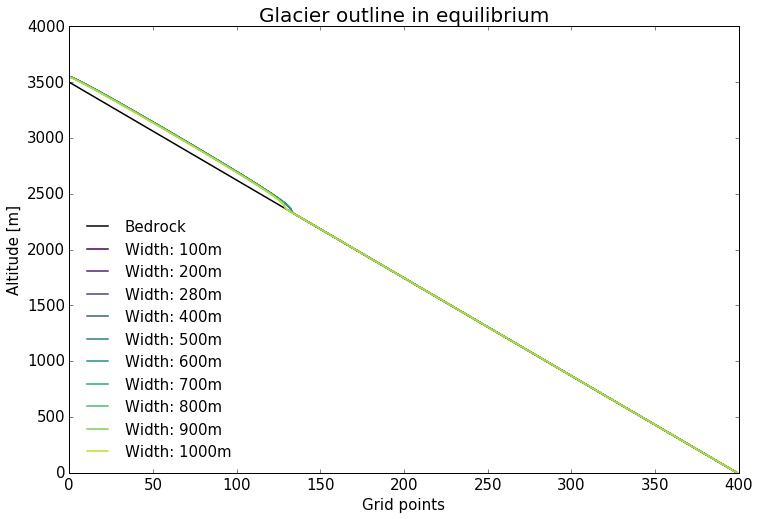

In [250]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

col_map = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=n_flowline)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=col_map)

plt.plot(bed_h_cont[0], color='k', label='Bedrock')

for i in range(0, n_flowline):
    col = scalarMap.to_rgba(i)
    plt.plot(surface_h_cont[i], color=col,
             label=flowline_name[i])
    
plt.title('Glacier outline in equilibrium')
plt.xlabel('Grid points')
plt.ylabel('Altitude [m]')
plt.legend(loc=3)

In [251]:
for l in lenght_cont:
    print(l)

3375.0
3400.0
3400.0
3375.0
3375.0
3375.0
3375.0
3250.0
3250.0
3250.0


In [256]:
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    thick.append(thick_)
    thickness[i] = np.median(thick_[:ind])
    
thickness

array([ 77.42152231,  77.40653669,  77.40653694,  77.4215227 ,
        77.42152279,  77.42152287,  77.42152294])

In [257]:
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    thick.append(thick_)
    thickness[i] = np.max(thick_[:ind])
    
thickness

array([ 82.0435478 ,  82.0435478 ,  82.0435478 ,  82.0435478 ,
        82.04354781,  82.04354781,  82.04354781])

134
135
135
134
134
134
134


array([ 73.06451324,  72.52346196,  72.52359011,  73.06491609,
        73.06500812,  73.06508944,  73.06516264])

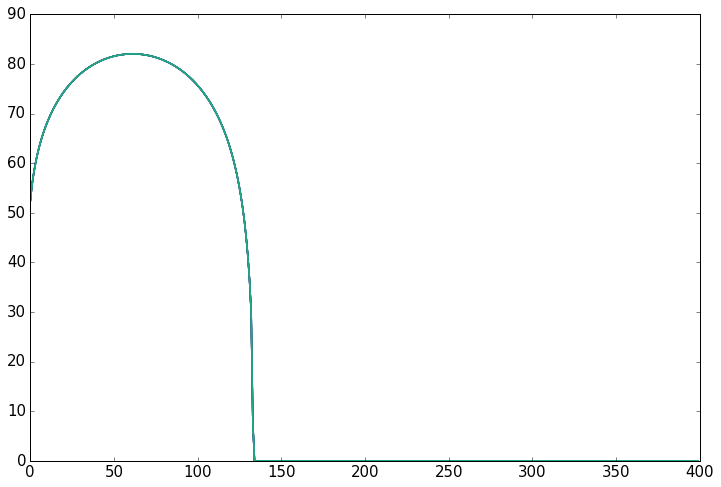

In [258]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(thick_ == 0)[0][0]
    print(ind)
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

132
131
131
130
130
130
130
130
130
130


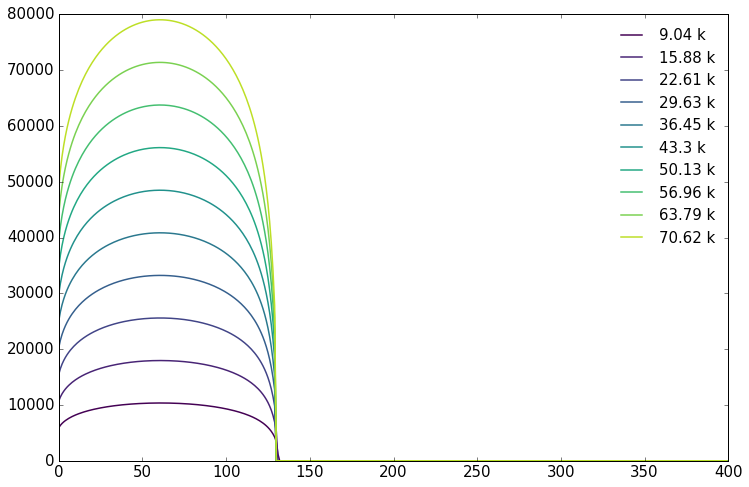

In [281]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    print(ind)
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{} k'.format(round(mean/1e3,2)), color=col)
    
plt.legend()

#### Vertical wall flowline

In [308]:
flowline_name = ['Width: 100m', 
                 'Width: 200m', 
                 'Width: 280m', 
                 'Width: 400m', 
                 'Width: 500m', 
                 'Width: 600m', 
                 'Width: 700m', 
                 'Width: 800m', 
                 'Width: 900m', 
                 'Width: 1000m']
n_flowline = len(flowline_name)
init_flowline = ['None']*n_flowline

In [309]:
for i, w in enumerate(np.arange(1, 10+1, 1)):
    if i == 2:
        w = 2.8
    widths = np.zeros(nx) + w * 100/map_dx
    print(widths[0]*map_dx)
    # Define our bed
    init_flowline[i] = VerticalWallFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=widths, map_dx=map_dx)
    
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[0].surface_h
    width_cont.append(model.fls[0].widths_m)
    sec_cont.append(model.fls[0].section)

100.0
200.0
280.0
400.0
500.0
600.0
700.0
800.0
900.0
1000.0
1: Running model for Width: 100m ...
    ... and storing output.
2: Running model for Width: 200m ...
    ... and storing output.
3: Running model for Width: 280m ...
    ... and storing output.
4: Running model for Width: 400m ...
    ... and storing output.
5: Running model for Width: 500m ...
    ... and storing output.
6: Running model for Width: 600m ...
    ... and storing output.
7: Running model for Width: 700m ...
    ... and storing output.
8: Running model for Width: 800m ...
    ... and storing output.
9: Running model for Width: 900m ...
    ... and storing output.
10: Running model for Width: 1000m ...
    ... and storing output.


In [314]:
for i, w in enumerate(np.arange(2, 3, 0.1)):
    widths = np.zeros(nx) + w * 100/map_dx
    print(widths[0]*map_dx)
    # Define our bed
    init_flowline[i] = VerticalWallFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=widths, map_dx=map_dx)
    
# Create containers to store model outputs
lenght_cont = np.zeros(n_flowline)
volume_cont = np.zeros(n_flowline)
year_cont = np.zeros(n_flowline)

width_cont = list()
sec_cont = list()

bed_h_cont = ['None']*n_flowline
surface_h_initial_cont = ['None']*n_flowline
surface_h_cont = ['None']*n_flowline

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {} ...'.format(i+1, flowline_name[i]))

    # Get single flowline
    init_flowline_ = init_flowline[i]
    # Initialize model and run for year years
    model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
    model.run_until_equilibrium()

    # Storing model output
    print('    ... and storing output.')
    lenght_cont[i] = model.length_m
    volume_cont[i] = model.volume_m3
    year_cont[i] = model.yr
    bed_h_cont[i] = init_flowline_.bed_h
    surface_h_initial_cont[i] = init_flowline_.surface_h
    surface_h_cont[i] = model.fls[0].surface_h
    width_cont.append(model.fls[0].widths_m)
    sec_cont.append(model.fls[0].section)

200.0
210.0
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
1: Running model for Width: 100m ...
    ... and storing output.
2: Running model for Width: 200m ...
    ... and storing output.
3: Running model for Width: 280m ...
    ... and storing output.
4: Running model for Width: 400m ...
    ... and storing output.
5: Running model for Width: 500m ...
    ... and storing output.
6: Running model for Width: 600m ...
    ... and storing output.
7: Running model for Width: 700m ...
    ... and storing output.
8: Running model for Width: 800m ...
    ... and storing output.
9: Running model for Width: 900m ...
    ... and storing output.
10: Running model for Width: 1000m ...
    ... and storing output.


In [322]:
for l in lenght_cont:
    print(l)

3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0
3250.0


In [315]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = surface_h_cont[i] - bed_h_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))

print('thickness')
print(mean)
print(med)
print(max_)

thickness
[68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0]
[72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0, 72.0]
[76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0, 76.0]


In [316]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = sec_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print('section')
print(mean)
print(med)
print(max_)

section
[13638.0, 14319.0, 15001.0, 15683.0, 16365.0, 17047.0, 17729.0, 18411.0, 19093.0, 19774.0]
[14424.0, 15146.0, 15867.0, 16588.0, 17309.0, 18031.0, 18752.0, 19473.0, 20194.0, 20915.0]
[15275.0, 16039.0, 16802.0, 17566.0, 18330.0, 19094.0, 19857.0, 20621.0, 21385.0, 22148.0]


In [321]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = width_cont[i]
    
    a = width__
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print('width')
print(mean)
print(med)
print(max_)

width
[200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0]
[200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0]
[200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0]


130
130
130
130
130
130
130
130
130
130


array([ 68.18769293,  68.18769293,  68.18769293,  68.18769293,
        68.18769293,  68.18769293,  68.18769293,  68.18769293,
        68.18769293,  68.18769293])

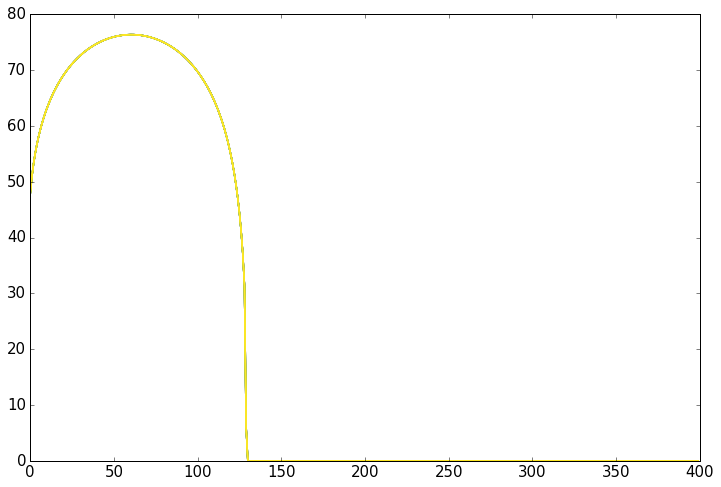

In [243]:
thick = list()
thickness = np.zeros(n_flowline)
for i in np.arange(0,n_flowline):
    col = scalarMap.to_rgba(i)
    
    thick_ = surface_h_cont[i] - bed_h_cont[i]
    ind = np.where(thick_ == 0)[0][0]
    print(ind)
    
    thick.append(thick_)
    thickness[i] = thick_[:ind].mean()
    plt.plot(thick_, color=col)
    
thickness

In [248]:
mean = list()
med = list()
max_ = list()
for i in np.arange(0,n_flowline):
    width__ = sec_cont[i]
    
    ind = np.where(width__ == 0)[0][0]
    a = width__[:ind]
    mean.append(round(a.mean()))
    med.append(round(np.median(a)))
    max_.append(round(a.max()))
    
print(mean)
print(med)
print(max_)

[6819.0, 13638.0, 19093.0, 27275.0, 34094.0, 40913.0, 47731.0, 54550.0, 61369.0, 68188.0]
[7212.0, 14424.0, 20194.0, 28849.0, 36061.0, 43273.0, 50485.0, 57698.0, 64910.0, 72122.0]
[7637.0, 15275.0, 21385.0, 30550.0, 38187.0, 45824.0, 53462.0, 61099.0, 68737.0, 76374.0]


In [247]:
width__

array([ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        100.,  100.,

130
130
130
130
130
130
130
130
130
130


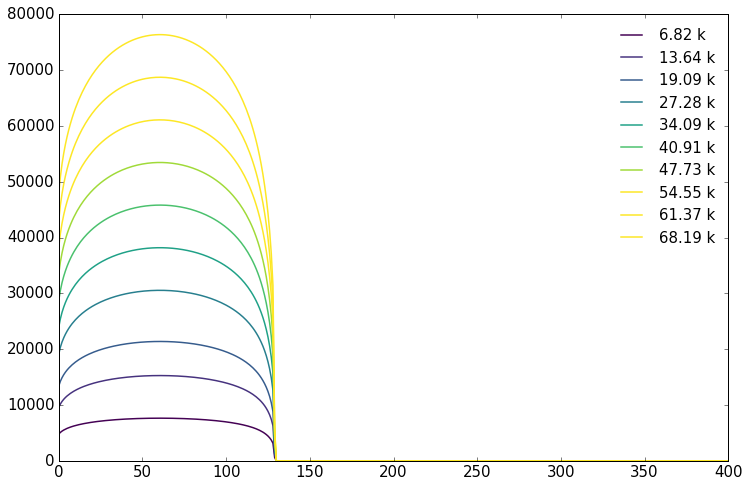

In [244]:
section.append(sec_cont)
for i, sec_ in enumerate(sec_cont):
    col = scalarMap.to_rgba(i)
    
    ind = np.where(sec_ == 0)[0][0]
    print(ind)
    mean = sec_[:ind].mean()
    plt.plot(sec_, label='{} k'.format(round(mean/1e3, 2)), color=col)
    
plt.legend()

##### Length and volume change over time

In [ ]:
# Define an array for all years of interest
year0 = 0
year1 = 400
year_step = 20
years = np.arange(year0, year1+1, year_step)
n_exp = years.size
print(years)

In [ ]:
# Define the wall angle [°]
angle = 45
lambdas = np.zeros(nx) + np.radians(angle)

flowline_name = ['Width: 100m', 
                 'Width: 1\'000m', 
                 'Width: 10\'000m']

widths = np.array([1.,10.,100.])
n_flowline = widths.size
init_flowline = ['None']*n_flowline

for i, w in enumerate(widths):
    widths = np.zeros(nx) + w
    # Define our bed
    init_flowline[i] = TrapezoidalFlowline(surface_h=surface_h, bed_h=bed_h,
                                           widths=w, map_dx=map_dx,
                                           lambdas=lambdas)

# Create containers to store model outputs
lenght_cont_ = np.zeros((n_flowline,n_exp))
volume_cont_ = np.zeros((n_flowline,n_exp))

print(type(lenght_cont_))

bed_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_initial_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]
surface_h_cont_ = [[None]*n_exp, [None]*n_exp, [None]*n_exp]

# Run the model for all three different initialized flowlines
# and store the outputs in the countainers
for i in range(0, n_flowline):
    # Console output to determine the state of the loop
    print('{}: Running model for {}:'.format(i+1, flowline_name[i]))
    # Get single flowline
    init_flowline_ = init_flowline[i]
    
    # Iterate over years and run model
    for j, year_ in enumerate(years):
        print('    - for {} years'.format(year_))
        model = FlowlineModel(init_flowline_, mb_model=mb_model, y0 = 0.)
        model.run_until(year_)
        # Storing model output
        lenght_cont_[i][j] = model.length_m
        volume_cont_[i][j] = model.volume_m3

In [ ]:
for i in range(0, n_flowline):
    plt.plot(years, lenght_cont_[i], label=flowline_name[i])

plt.title('Glacier lenght development over time')
plt.xlabel('Years')
plt.ylabel('Length [m]')
plt.legend(loc='best')

In [ ]:
for l in lenght_cont_:
    print(l[-1])